In [2]:
import numpy as np
import matplotlib.pyplot as plt

Байесовская линейная регрессия

Предполагаем, что данные сгенерированы из $y = Xw + \varepsilon, ~~ w \sim \mathcal{N}(0, A^{-1}),~~ \varepsilon \sim \mathcal{N}(0, \sigma^2 I)$. 

Для нее считается обоснованность
$$
p(y|X, A, \sigma^2) = \mathcal{N}(0, \sigma^2 I + X A^-1, X^T)
$$
Тогда:

$$
\log p(y|X, A, \sigma^2) \propto -\frac{1}{2} \log\det (\sigma^2 I + X A^{-1}X) -\frac{1}{2} y^T(\sigma^2 I + X A^{-1}X)y
$$


рассмотрим на примере $y_i = \sin x_i + \varepsilon_i$

рассмотрим что будет происходить при усложнении модели $M_k(x) = \sum^k_{i=0} w_i x^i$

In [3]:
sigma_sq = 0.1
alpha = 0.01


def gen_w(n):
    return np.random.normal(loc=0, scale=alpha ** (-0.5), size=(n,))


gen_w(3)


def gen_x():
    return (np.random.rand() - 0.5) * np.pi


def f(x):
    return np.sin(x) + np.random.rand() * (sigma_sq**0.5)


def make_X(x, n):
    """
    делает матрицу из степеней x
    """
    return np.vander(x, n)


def compute_log_evidence(x, y, sigma_sq, alpha, n):
    m = len(x)
    A = 1 / alpha * np.eye(n)

    X = make_X(x, n)
    tmp_mat = sigma_sq * np.eye(m) + X @ A @ X.T
    rez = -0.5 * (np.log(np.linalg.det(tmp_mat)) + np.einsum("i,ij,j", y, tmp_mat, y))
    return rez


k = 2000
x_s = np.array([gen_x() for _ in range(k)])
y_s = np.array([f(x) for x in x_s])

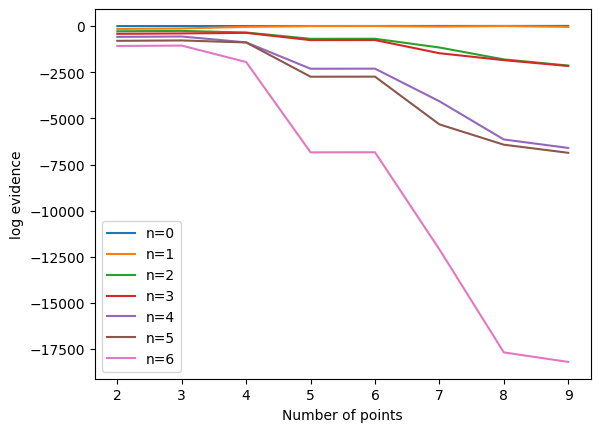

In [7]:
fig, ax = plt.subplots()
for n in [0, 1, 2, 3, 4, 5, 6]:
    alg_rez = []
    num_points = list(
        range(
            2,
            10,
        )
    )
    for num in num_points:
        log_ev = compute_log_evidence(x_s[:num], y_s[:num], sigma_sq, alpha, n)
        alg_rez.append(log_ev)
    ax.plot(num_points, alg_rez, label=f"{n=}")
plt.xlabel("Number of points")
plt.ylabel("log evidence")
plt.legend()

1) показан байесовский инференс, когда постериор можно точно считать

2) видим, что у слишком простых моделей evidence маленький. Также у слишком сложных моделей. Они начнут работать, когда будет больше данных.

In [ ]:
s